In [3]:
# !! ONLY RUN THIS SCRIPT ONCE !!
import sys
sys.path.append('../src')  # Adjust the relative path to match project structure
import data_processing as dp

import os
os.chdir("..")  # Move up one level to the project root
print("Current working directory:", os.getcwd())

IndentationError: expected an indented block after 'if' statement on line 74 (data_processing.py, line 75)

In [2]:
file_path = "../data/raw/empatheticdialogues/train.csv"
train_data = dp.load_empathy_dataset(file_path)
train_data.head()

NameError: name 'dp' is not defined

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84169 entries, 0 to 84168
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   conv_id        84169 non-null  object
 1   utterance_idx  84169 non-null  int64 
 2   context        84169 non-null  object
 3   prompt         84169 non-null  object
 4   speaker_idx    84169 non-null  int64 
 5   utterance      84169 non-null  object
 6   selfeval       84169 non-null  object
 7   tags           755 non-null    object
dtypes: int64(2), object(6)
memory usage: 5.1+ MB


In [6]:
train_data.describe()

,utterance_idx,speaker_idx
count,84169.000000,84169.000000
mean,2.712246,266.622664
std,1.338068,205.179436
min,1.000000,0.000000
25%,2.000000,79.000000
50%,3.000000,244.000000
75%,4.000000,389.000000
max,8.000000,853.000000


In [12]:
train_data.isnull().sum()

conv_id              0
utterance_idx        0
context              0
prompt               0
speaker_idx          0
utterance            0
selfeval             0
tags             83414
dtype: int64

In [19]:
train_data['context'].value_counts()

surprised       4310
excited         3218
angry           2991
proud           2933
sad             2883
annoyed         2880
lonely          2751
grateful        2736
afraid          2728
terrified       2708
guilty          2675
disgusted       2663
furious         2663
confident       2657
anxious         2651
hopeful         2638
anticipating    2632
impressed       2630
nostalgic       2595
disappointed    2567
joyful          2555
jealous         2540
prepared        2529
content         2479
devastated      2425
embarrassed     2407
sentimental     2298
caring          2292
trusting        2270
ashamed         2191
apprehensive    2014
faithful        1660
Name: context, dtype: int64

In [26]:
train_data['context'].drop_duplicates(inplace=True)
train_data

,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,1,I remember going to see the fireworks with my ...,5|5|5_2|2|5,NaN
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,0,Was this a friend you were in love with_comma_...,5|5|5_2|2|5,NaN
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,1,This was a best friend. I miss her.,5|5|5_2|2|5,NaN
3,hit:0_conv:1,4,sentimental,I remember going to the fireworks with my best...,0,Where has she gone?,5|5|5_2|2|5,NaN
4,hit:0_conv:1,5,sentimental,I remember going to the fireworks with my best...,1,We no longer talk.,5|5|5_2|2|5,NaN
...,...,...,...,...,...,...,...,...
84164,hit:12424_conv:24848,5,sentimental,I found some pictures of my grandma in the att...,389,Yeah reminds me of the good old days. I miss ...,5|5|5_5|5|5,NaN
84165,hit:12424_conv:24849,1,surprised,I woke up this morning to my wife telling me s...,294,I woke up this morning to my wife telling me s...,5|5|5_5|5|5,NaN
84166,hit:12424_conv:24849,2,surprised,I woke up this morning to my wife telling me s...,389,Oh hey that's awesome! That is awesome right?,5|5|5_5|5|5,NaN
84167,hit:12424_conv:24849,3,surprised,I woke up this morning to my wife telling me s...,294,It is soooo awesome. We have been wanting a b...,5|5|5_5|5|5,NaN


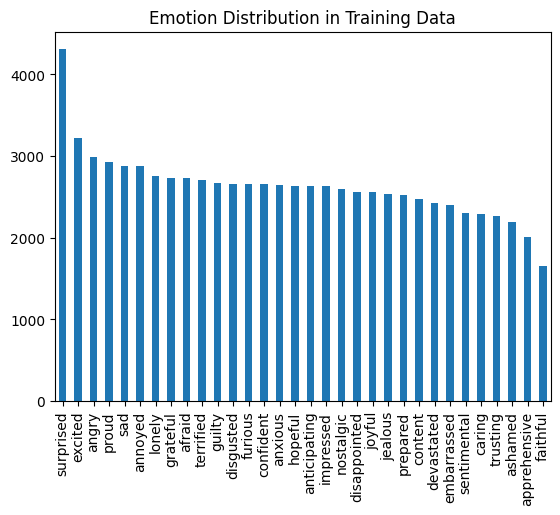

In [15]:
import matplotlib.pyplot as plt

# Bar chart of emotion distribution
train_data['context'].value_counts().plot(kind='bar')
plt.title("Emotion Distribution in Training Data")
plt.show()

In [22]:
from transformers import pipeline
    
# Load GPT-2 model for text generation
generator = pipeline("text-generation", model="gpt2")

# Test the generator with a simple prompt
response = generator("Provide empathetic advice: My partner just left me, and I feel lost.", max_length=500)
print("AI Response:", response[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


AI Response: Provide empathetic advice: My partner just left me, and I feel lost. It's very difficult to bring up the topic in the midst of being in love and with other people of color without sounding like a bigoted person. I feel like I'm not being understood by the community. I'm not being understood by the person that asked me to leave. I'm just not getting any of the recognition.

As much as this hurts my heart right now or even when I'm feeling the pain, it has real to do with how it feels to be there for the people within my community. I know others have felt the same way by being a part of what happened to me. What happened to me and this community, and I will continue to feel my pain. We are so grateful to these people for understanding if you think this is something you should be listening to, because sometimes it's worth it. Your voice matters too, so I appreciate your support.

You can send that to my email below.

Thank you.

~ Chris

For the past 8 months I've been involv